### Connor Contursi - Task 2

# Data Processing

In [1]:
# module imports
import numpy as np
import pandas as pd

# Sklearn module imports
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#---------------------------------------------------

# Imports up audio data in proper format for sklearn
up_array = np.genfromtxt("Up.csv", delimiter = ",", dtype = str, usecols = range(64), skip_header = 1)
up_array = up_array.reshape(25,64)
up_data_array = pd.DataFrame(up_array)

# Imports down audio data in proper format for sklearn
down_array = np.genfromtxt("Down.csv", delimiter = ",", dtype = str, usecols = range(64), skip_header = 1)
down_array = down_array.reshape(25,64)
down_data_array = pd.DataFrame(down_array)

# Imports stop audio data in proper format for sklearn
stop_array = np.genfromtxt("Stop.csv", delimiter = ",", dtype = str, usecols = range(64), skip_header = 1)
stop_array = stop_array.reshape(25,64)
stop_data_array = pd.DataFrame(stop_array)

# Imports go audio data in proper format for sklearn
go_array = np.genfromtxt("Go.csv", delimiter = ",", dtype = str, usecols = range(64), skip_header = 1)
go_array = go_array.reshape(25,64)
go_data_array = pd.DataFrame(go_array)

# Combines audio data into single set
data = pd.concat([up_data_array, down_data_array, stop_data_array, go_data_array])

# Creates y labels of 25: 0s, 25: 1s, 25: 2s, and 25: 3s
y = np.zeros(100)
for a in range (25, 50, 1):
    y[a] = 1
for b in range (50, 75, 1):
    y[b] = 2
for c in range (75, 100, 1):
    y[c] = 3

### Logistic Regression Model & Results

              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         3
         1.0       0.00      0.00      0.00         3
         2.0       0.71      0.83      0.77         6
         3.0       0.57      0.50      0.53         8

    accuracy                           0.50        20
   macro avg       0.40      0.42      0.41        20
weighted avg       0.49      0.50      0.49        20

ACCURACY OF THE MODEL:  0.5


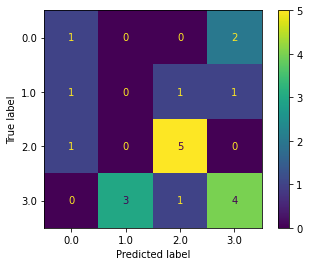

In [27]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Decision Trees Model & Results

              precision    recall  f1-score   support

         0.0       0.33      0.17      0.22         6
         1.0       0.67      0.40      0.50         5
         2.0       0.14      0.17      0.15         6
         3.0       0.29      0.67      0.40         3

    accuracy                           0.30        20
   macro avg       0.36      0.35      0.32        20
weighted avg       0.35      0.30      0.30        20



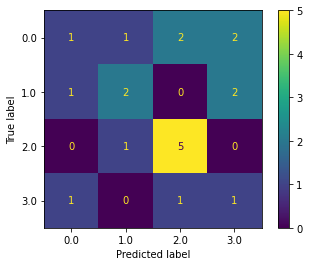

In [32]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

# creates decision tree classifier; fits data with trained sets; generates predictions from test split
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Random Forests Model & Results

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.33      0.20      0.25         5
         2.0       0.14      0.25      0.18         4
         3.0       0.14      0.20      0.17         5

    accuracy                           0.15        20
   macro avg       0.15      0.16      0.15        20
weighted avg       0.15      0.15      0.14        20

ACCURACY OF THE MODEL:  0.15


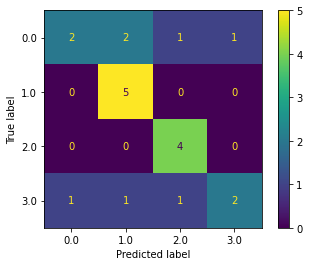

In [29]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

# creates random forest classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))